In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Set visualization styles
sns.set(style="whitegrid")
plt.style.use("ggplot")

In [4]:
# Load data
df = pd.read_csv("financialNews.csv")

In [5]:
# 1. Basic Information
print("Data Overview:")
print(df.info())  # Check data types and non-null counts
print("\nFirst five rows of data:")
print(df.head())

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95459 entries, 0 to 95458
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   datetime     95459 non-null  object 
 1   title        95459 non-null  object 
 2   description  95459 non-null  object 
 3   ticker       95459 non-null  object 
 4   company      95459 non-null  object 
 5   sector       95459 non-null  object 
 6   industry     95459 non-null  object 
 7   change_pct   95459 non-null  float64
dtypes: float64(1), object(7)
memory usage: 5.8+ MB
None

First five rows of data:
                   datetime  \
0  Fri 24 Nov 2023, 12:00AM   
1  Thu 23 Nov 2023, 07:00PM   
2  Thu 23 Nov 2023, 05:43PM   
3  Thu 23 Nov 2023, 04:47PM   
4  Thu 23 Nov 2023, 03:25PM   

                                               title  \
0  OpenAI turmoil exposes threat to Microsoft’s i...   
1  10 Can’t Miss Black Friday Electronics Deals a...   
2  UPDATE 1-German 

In [6]:
# 2. Check for Missing Values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
datetime       0
title          0
description    0
ticker         0
company        0
sector         0
industry       0
change_pct     0
dtype: int64


In [7]:
# 3. Descriptive Statistics
print("\nDescriptive statistics for numerical columns:")
print(df.describe())  # Summary for numerical columns

print("\nValue counts for 'sector' column:")
print(df['sector'].value_counts())  # Distribution of categorical data (Sector)

print("\nValue counts for 'industry' column:")
print(df['industry'].value_counts())  # Distribution of categorical data (Industry)

print("\nValue counts for 'company' column:")
print(df['company'].value_counts())  # Distribution of categorical data (Company)

print("\nValue counts for 'title' column:")
print(df['title'].value_counts())  # Distribution of categorical data (Title)

print("\nValue counts for 'description' column:")
print(df['description'].value_counts())  # Distribution of categorical data (Description)


Descriptive statistics for numerical columns:
         change_pct
count  95459.000000
mean       0.078294
std        3.141043
min      -59.154868
25%       -1.139105
50%        0.060742
75%        1.241035
max       65.976421

Value counts for 'sector' column:
sector
Consumer Cyclical         20002
Technology                19264
Communication Services    17299
Financial Services        15520
Consumer Defensive         7338
Industrials                6387
Healthcare                 6031
Energy                     2202
Utilities                   754
Basic Materials             633
Real Estate                  29
Name: count, dtype: int64

Value counts for 'industry' column:
industry
Auto Manufacturers                     10583
Internet Content & Information          9485
Semiconductors                          6501
Internet Retail                         5057
Entertainment                           4945
Software—Infrastructure                 4869
Banks—Diversified                    

In [8]:
# Number of distinct entries in the 'industry' column
distinct_industries = df['industry'].nunique()
print(f"Number of distinct entries in the 'industry' column: {distinct_industries}")

Number of distinct entries in the 'industry' column: 48


In [9]:
print(df['company'].value_counts().head(15))

company
Tesla, Inc.                           7702
Alphabet Inc.                         6376
Amazon.com, Inc.                      5057
Apple Inc.                            4479
Microsoft Corporation                 4175
American International Group, Inc.    3549
Meta Platforms, Inc.                  3109
The Walt Disney Company               2959
NVIDIA Corporation                    2670
Netflix, Inc.                         1986
Walmart Inc.                          1965
The Goldman Sachs Group, Inc.         1902
JPMorgan Chase & Co.                  1830
Ford Motor Company                    1814
The Boeing Company                    1739
Name: count, dtype: int64


In [10]:
print(df['company'].value_counts().tail(50))

company
Broadcom Inc.                              575
Visa Inc.                                  550
United Parcel Service, Inc.                533
Merck & Co., Inc.                          528
The Coca-Cola Company                      521
Dow Inc.                                   518
General Electric Company                   512
UnitedHealth Group Incorporated            475
Caterpillar Inc.                           465
RTX Corporation                            460
AbbVie Inc.                                446
American Express Company                   424
T-Mobile US, Inc.                          423
CVS Health Corporation                     391
Abbott Laboratories                        390
Duke Energy Corporation                    379
Amgen Inc.                                 373
The Procter & Gamble Company               365
Gilead Sciences, Inc.                      353
ConocoPhillips                             330
Medtronic plc                              315
Accen

In [11]:
# Count entries in the 'description' column with less than 40 characters
short_descriptions = df['description'].apply(lambda x: len(str(x)) < 50).sum()
print(f"Number of entries in the 'description' column with less than 40 characters: {short_descriptions}")


Number of entries in the 'description' column with less than 40 characters: 1870


In [12]:
# Filter and print entries in the 'description' column with less than 40 characters
short_descriptions = df[df['description'].apply(lambda x: len(str(x)) < 40)]
print("Entries in the 'description' column with less than 40 characters:")
print(short_descriptions['description'])


Entries in the 'description' column with less than 40 characters:
72             Q4 2023 Deere & Co Earnings Call
173      Summary of pre-market news for Nov. 22
537                     The [round of layoffs](
586                  ↗️ [**Microsoft (MSFT)**](
957           Q3 2024 Walmart Inc Earnings Call
                          ...                  
95004                            By Peter Nurse
95128                          By Sam Boughedda
95129                          By Sam Boughedda
95198                         By Geoffrey Smith
95233                            By Peter Nurse
Name: description, Length: 1483, dtype: object


In [13]:
# Count entries in the 'description' column that start with "By"
by_descriptions_count = df['description'].apply(lambda x: str(x).startswith("By")).sum()
print(f"Number of entries in the 'description' column that start with 'By': {by_descriptions_count}")


Number of entries in the 'description' column that start with 'By': 1138


In [14]:
# 5. Convert 'datetime' to DateTime format for time series analysis
df['datetime'] = pd.to_datetime(df['datetime'], format="%a %d %b %Y, %I:%M%p")

# Add 'year' and 'month' columns for analysis
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month

<Figure size 1200x800 with 0 Axes>

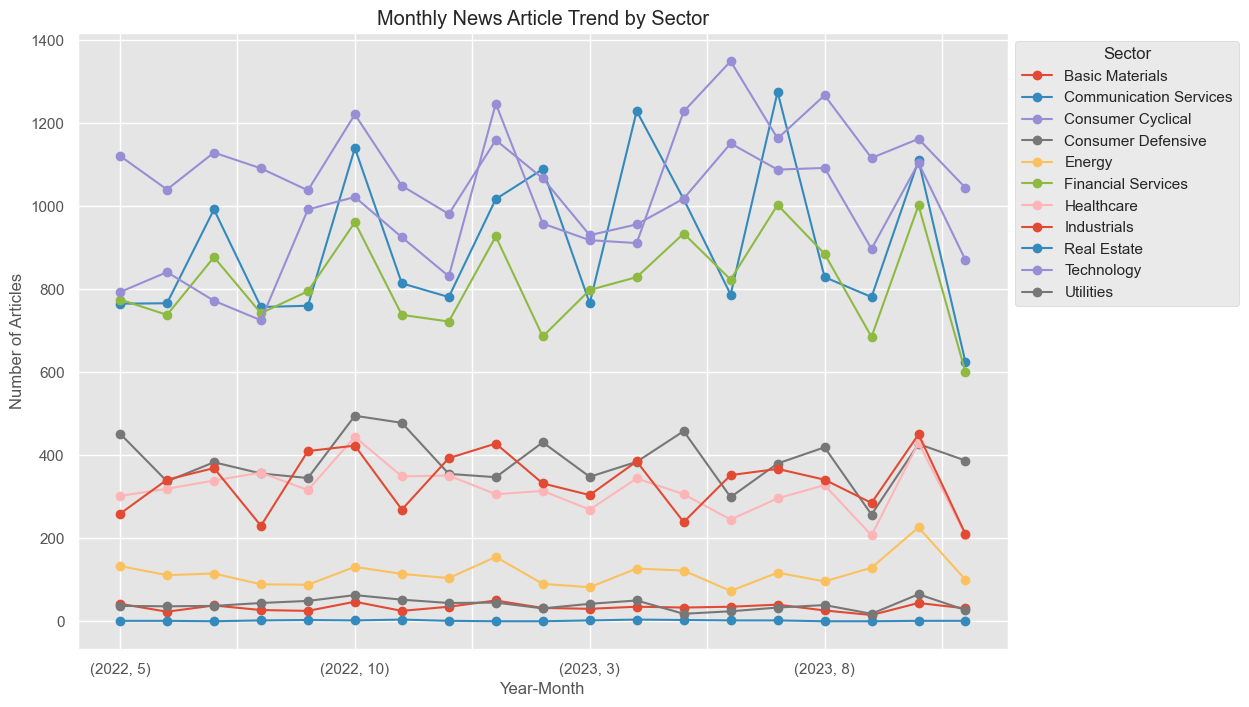

In [15]:
# 9. Time Series Analysis
# Monthly trend of articles by sector
df_monthly = df.groupby(['year', 'month', 'sector']).size().unstack().fillna(0)

plt.figure(figsize=(12, 8))
df_monthly.plot(kind='line', stacked=False, figsize=(12, 8), marker='o')
plt.title("Monthly News Article Trend by Sector")
plt.xlabel("Year-Month")
plt.ylabel("Number of Articles")
plt.legend(title="Sector", loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

In [16]:
print("Earliest date:", df['datetime'].min())
print("Latest date:", df['datetime'].max())


Earliest date: 2022-05-02 04:00:00
Latest date: 2023-11-24 00:00:00


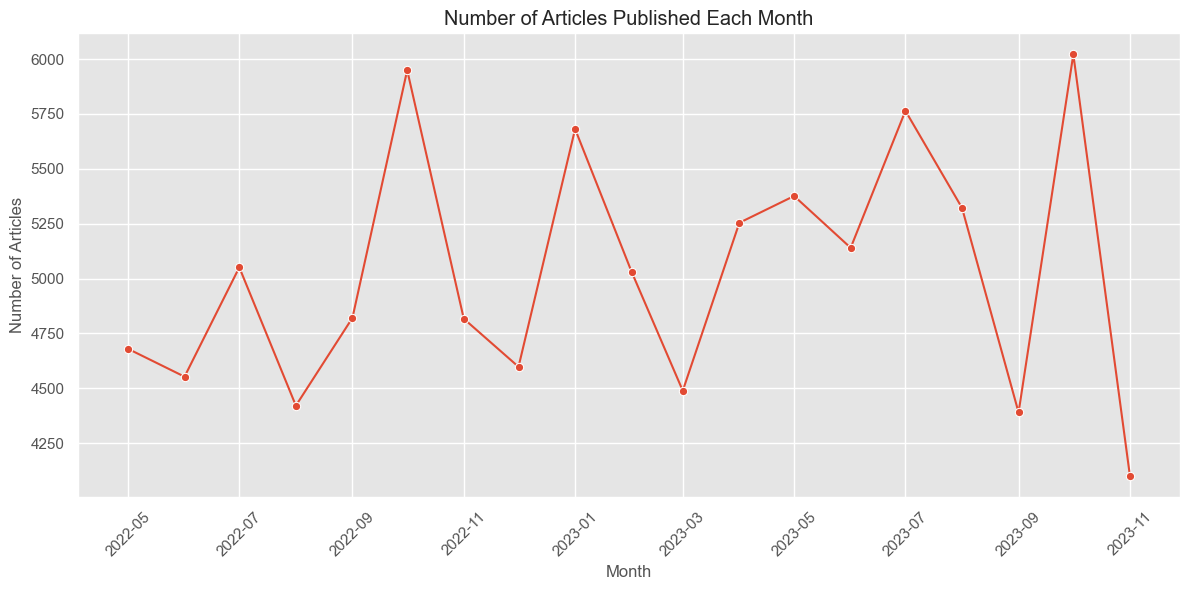

In [17]:
df['year_month'] = df['datetime'].dt.to_period('M')  # Extract year and month as a period
monthly_counts = df.groupby('year_month').size().reset_index(name='article_count')

# Convert 'year_month' back to datetime for plotting
monthly_counts['year_month'] = monthly_counts['year_month'].dt.to_timestamp()

# Plot the monthly article count
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_counts, x='year_month', y='article_count', marker='o')
plt.title("Number of Articles Published Each Month")
plt.xlabel("Month")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()